## Importando bibliotecas

In [1]:
#Manipulação de dados
import pandas as pd
import numpy as np
import ast

# Visualização de dados
import missingno
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py

#Sistema de recomendaçãp
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

#Metricas
from sklearn.metrics.pairwise import cosine_similarity

#Deploy do sistema de recomendação
import pickle

## Carregando conjunto de dados e primeiras informações

In [2]:
df = pd.read_csv("data/movies.csv")

In [3]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
df.shape

(5941, 22)

In [6]:
linhas, colunas = df.shape

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5941 entries, 0 to 5940
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                5941 non-null   int64  
 1   genres                5941 non-null   object 
 2   homepage              1848 non-null   object 
 3   id                    5941 non-null   int64  
 4   keywords              5941 non-null   object 
 5   original_language     5941 non-null   object 
 6   original_title        5940 non-null   object 
 7   overview              5937 non-null   object 
 8   popularity            5941 non-null   float64
 9   production_companies  5941 non-null   object 
 10  production_countries  5941 non-null   object 
 11  release_date          5939 non-null   object 
 12  revenue               5941 non-null   int64  
 13  runtime               5939 non-null   float64
 14  spoken_languages      5941 non-null   object 
 15  status               

#### Informações estatisticas

In [8]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,5.941000e+03,5941.000000,5941.000000,5.941000e+03,5939.000000,5941.000000,5941.000000
mean,2.759006e+07,146524.670089,26.619002,7.859894e+07,106.528372,6.177513,846.335970
std,4.178737e+07,212172.277182,50.423799,1.708481e+08,22.274483,1.168723,1612.765509
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,9824.000000,5.778724,0.000000e+00,94.000000,5.700000,66.000000
50%,1.100000e+07,26815.000000,14.617944,1.310000e+07,103.000000,6.300000,276.000000
75%,3.600000e+07,241254.000000,30.920075,8.210238e+07,117.000000,6.900000,881.000000
max,3.800000e+08,992536.000000,1553.840000,2.797801e+09,338.000000,10.000000,25104.000000


In [9]:
df.describe(include = "O")

,genres,homepage,keywords,original_language,original_title,overview,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,cast,crew
count,5941,1848,5941,5941,5940,5937,5941,5941,5939,5941,5941,4889,5941,5941,5941
unique,1627,1825,5190,38,5900,5916,4745,1517,3901,708,3,4837,5888,5884,5902
top,"[{""id"": 18, ""name"": ""Drama""}]",http://www.thehungergames.movie/,[],en,The Believer,The nightmare isn't over as unstoppable killer...,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2021-06-18,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,The Believer,[],[]
freq,370,4,566,5621,2,2,372,2977,10,3171,5933,4,2,48,30


#### Dicionário de dados

In [10]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'cast', 'crew'],
      dtype='object')

Dicionário de dados 

* budget: Orçamento do Filmes em Dólares
* genres: Lista de Dicionários com todos os gêneros associados ao filme
* homepage: Site oficial do filme
* id: Identificação (ID) do filme
* keywords: Palavras chaves associadas ao filme
* original_language: Idioma original do filme
* original_title: Título original do filme
* overview: Breve descrição do filme
* popularity: Pontuação dada pelo TMDB
* production_companies: Produtoras envolvidas na produção do filme
* release_data: Data de Lançamento do Filme
* revenue: Receita Total do filme em dólares
* runtime: Tempo de execução do filme em minutos
* spoken_language: Idiomas falados no filme
* status: Status do filme (lançado, para ser lançado, anunciado, etc)
* tagline: Tagline do filme
* title: Título oficial do filme
* vote_average: Avaliação média do filme
* vote_count: Número de votos contabilizados pelo TMDB
* cast: Elenco do filme
* crew: Equipe Técnica

#### Dados faltantes

In [11]:
df.isnull().sum()

budget                     0
genres                     0
homepage                4093
id                         0
keywords                   0
original_language          0
original_title             1
overview                   4
popularity                 0
production_companies       0
production_countries       0
release_date               2
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                 1052
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
dtype: int64

<AxesSubplot:>

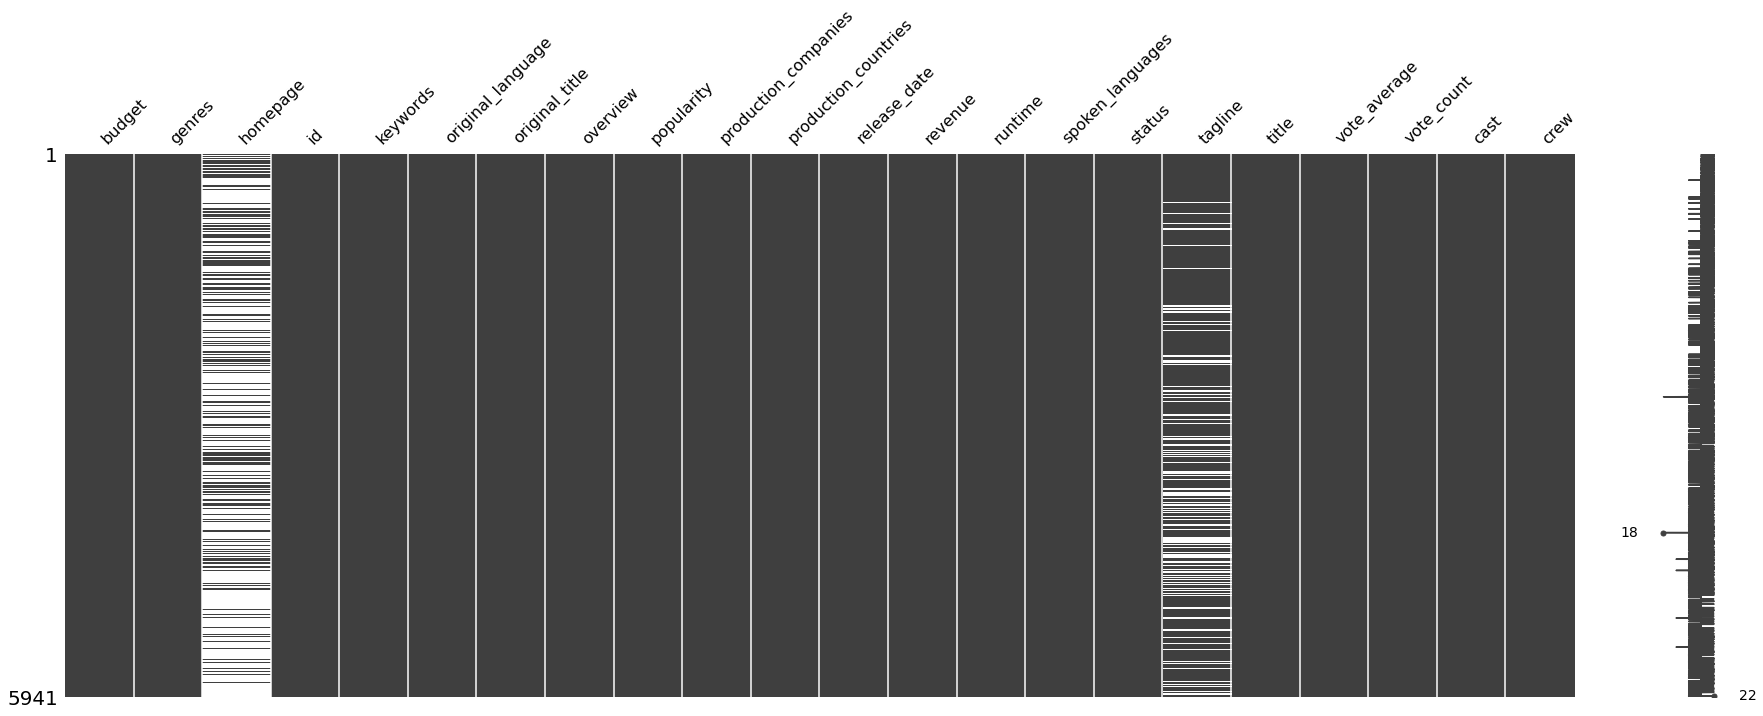

In [12]:
missingno.matrix(df, figsize=(30,10))

In [13]:
df.isnull().sum().sort_values(ascending=False)

homepage                4093
tagline                 1052
overview                   4
release_date               2
runtime                    2
original_title             1
cast                       0
vote_count                 0
vote_average               0
title                      0
status                     0
spoken_languages           0
budget                     0
revenue                    0
genres                     0
production_countries       0
production_companies       0
popularity                 0
original_language          0
keywords                   0
id                         0
crew                       0
dtype: int64

In [14]:
faltantes_percentual = (df.isnull().sum()/linhas) * 100

In [15]:
print(faltantes_percentual)

budget                   0.000000
genres                   0.000000
homepage                68.894126
id                       0.000000
keywords                 0.000000
original_language        0.000000
original_title           0.016832
overview                 0.067329
popularity               0.000000
production_companies     0.000000
production_countries     0.000000
release_date             0.033664
revenue                  0.000000
runtime                  0.033664
spoken_languages         0.000000
status                   0.000000
tagline                 17.707457
title                    0.000000
vote_average             0.000000
vote_count               0.000000
cast                     0.000000
crew                     0.000000
dtype: float64


### Dados duplicados

In [16]:
df[df.duplicated()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
5827,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",NaN,750253,"[{'id': 14985, 'name': 'ireland'}, {'id': 1569...",en,My Son,"When a man's only son goes missing, he travels...",12.945,"[{'id': 104, 'logo_path': '/9aotxauvc9685tq9pT...",...,0,95.0,"[{'english_name': 'Gaelic', 'iso_639_1': 'gd',...",Released,A groundbreaking achievement in filmmaking whe...,My Son,6.295,278,"[{'adult': False, 'gender': 2, 'id': 5530, 'kn...","[{'adult': False, 'gender': 2, 'id': 8570, 'kn..."
5930,0,"[{'id': 18, 'name': 'Drama'}, {'id': 878, 'nam...",NaN,765245,"[{'id': 2964, 'name': 'future'}, {'id': 6155, ...",en,Swan Song,"In the near future, Cameron Turner is diagnose...",36.017,"[{'id': 10039, 'logo_path': '/b8w4LldQolMKiLZw...",...,0,112.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"A thought-provoking exploration of love, loss,...",Swan Song,7.344,334,"[{'adult': False, 'gender': 2, 'id': 932967, '...","[{'adult': False, 'gender': 2, 'id': 10684, 'k..."


In [17]:
df = df.drop_duplicates()

## Primeiras análises em cada feature

#### Budget: Orçamento do filme em dolar

In [18]:
df["budget"].dtype

dtype('int64')

In [19]:
df["budget"].isnull().sum()

0

In [21]:
df["budget"].describe().round(2)

count    5.939000e+03
mean     2.759935e+07
std      4.179134e+07
min      0.000000e+00
25%      0.000000e+00
50%      1.100000e+07
75%      3.600000e+07
max      3.800000e+08
Name: budget, dtype: float64

In [22]:
df['budget'].min()

0

In [23]:
df['budget'].max()

380000000

In [24]:
#Gráfico de dispersão para os anos - para saber se existe alguns anoss outliers
figura0 = go.Box(y=df["budget"],
                 name = "budget",
                 marker = {"color":'#f39c12'})

data = [figura0]

layout = go.Layout(title="Dispersão do orçamento dos filmes",
                   titlefont = {'family': 'Arial',
                                'size': 22,
                                'color': '#7f7f7f'},
                   yaxis = {"title":"Orçamento dos filmes"},
                   paper_bgcolor = 'rgb(243, 243, 243)',
                   plot_bgcolor = 'rgb(243, 243, 243)')

#Utilizando os argumentos paper_bgcolor e plot_bgcolor, vamos alterar a cor de fundo do gráfico.

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

#### genres: Lista de dicionário com todos os gêneros associados ao filme

In [25]:
df["genres"].dtype

dtype('O')

In [26]:
df["genres"].isnull().sum()

0

In [27]:
df["genres"].head()

0    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1    [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
Name: genres, dtype: object

####  homepage: Site oficional do filme - (3982 dados faltantes)

In [28]:
df["homepage"].dtype

dtype('O')

In [29]:
df["homepage"].isnull().sum()

4091

Muitos dados faltantes, cerca de 70%

In [30]:
df["homepage"].head()

0                     http://www.avatarmovie.com/
1    http://disney.go.com/disneypictures/pirates/
2     http://www.sonypictures.com/movies/spectre/
3              http://www.thedarkknightrises.com/
4            http://movies.disney.com/john-carter
Name: homepage, dtype: object

#### id: Identificação (ID) do filme

In [31]:
df["id"].dtype

dtype('int64')

In [32]:
df["id"].isnull().sum()

0

In [32]:
df["id"].head()

0     19995
1       285
2    206647
3     49026
4     49529
Name: id, dtype: int64

#### keywords: Palavras chaves associadas 

Lista de dicionários contendo as palavras chaves

In [33]:
df["keywords"].dtype

dtype('O')

In [34]:
df["keywords"].isnull().sum()

0

In [35]:
df["keywords"].head()

0    [{"id": 1463, "name": "culture clash"}, {"id":...
1    [{"id": 270, "name": "ocean"}, {"id": 726, "na...
2    [{"id": 470, "name": "spy"}, {"id": 818, "name...
3    [{"id": 849, "name": "dc comics"}, {"id": 853,...
4    [{"id": 818, "name": "based on novel"}, {"id":...
Name: keywords, dtype: object

#### original_language: Idioma original do filme

In [36]:
df["original_language"].dtype

dtype('O')

In [37]:
df["original_language"].isnull().sum()

0

In [38]:
df["original_language"].head()

0    en
1    en
2    en
3    en
4    en
Name: original_language, dtype: object

In [39]:
df["original_language"].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el', 'ca'], dtype=object)

In [40]:
df["original_language"].value_counts()

en    5619
fr      74
es      37
zh      28
de      27
ja      21
hi      19
it      17
cn      12
ko      11
ru      11
pt      10
da       7
sv       5
fa       4
nl       4
th       3
ar       3
he       3
tr       2
ro       2
id       2
cs       2
ta       2
nb       1
af       1
pl       1
is       1
hu       1
vi       1
ky       1
xx       1
te       1
no       1
sl       1
ps       1
el       1
ca       1
Name: original_language, dtype: int64

In [41]:
df["original_language"].describe()

count     5939
unique      38
top         en
freq      5619
Name: original_language, dtype: object

In [42]:
#Plotando o rank dos top 10 fatores que influenciam no preço do imovel
trace1 = go.Bar(x =  df["original_language"].value_counts().index[1:10],
                y =  df["original_language"].value_counts().values[1:10],
                marker = {"color":"Orange",
                              "line": {'width': 2,
                                      'color': '#c0392b'}})

layout = go.Layout(title= "Top 10 - Idiomas originais de filmes",
                   yaxis = {"title": "Quantidade"},
                   xaxis = {"title":"Idiomas originais"})

data = [trace1]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

Deixamos o ingles de lado no gráfico acima, disparado esta em primeiro lugar com 5478

#### original_title: Título original do filme

In [43]:
df["original_title"].dtype

dtype('O')

In [44]:
df["original_title"].isnull().sum()

1

In [45]:
df["original_title"].head()

0                                      Avatar
1    Pirates of the Caribbean: At World's End
2                                     Spectre
3                       The Dark Knight Rises
4                                 John Carter
Name: original_title, dtype: object

In [46]:
df["original_title"].describe()

count      5938
unique     5900
top       Shaft
freq          2
Name: original_title, dtype: object

In [47]:
df["original_title"].unique()

array(['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre',
       ..., 'American Underdog', 'Memoria', nan], dtype=object)

#### overview: Breve descrição do filme (6 dados faltantes)

In [48]:
df["overview"].dtype

dtype('O')

In [49]:
df["overview"].isnull().sum()

4

In [50]:
df["overview"].describe()

count                                                  5935
unique                                                 5916
top       When a professor develops a vaccine that elimi...
freq                                                      2
Name: overview, dtype: object

In [51]:
df["overview"].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

#### popularity: Pontuação dada pelo TMDB

In [52]:
df["popularity"].dtype

dtype('float64')

In [53]:
df["popularity"].isnull().sum()

0

In [54]:
df["popularity"].describe()

count    5939.000000
mean       26.619722
std        50.431830
min         0.000000
25%         5.775101
50%        14.617944
75%        30.914887
max      1553.840000
Name: popularity, dtype: float64

In [55]:
#Plotando um hisograma dos anos 
trace1 = go.Histogram(x =  df["popularity"],
                      marker = {"color":"Green",
                              "line": {'width': 2,
                                      'color': '#c0392b'}})

layout = go.Layout(title= "Histograma da popularidade dos filmes",
                   yaxis = {"title": "Quantidade"},
                   xaxis = {"title":"Popularidade"})

data = [trace1]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

#### production_companies: Produtoras envolvidas na produção do filme

lista de dicionários contendo a produtora

In [56]:
df["production_companies"].dtype

dtype('O')

In [57]:
df["production_companies"].isnull().sum()

0

In [58]:
df["production_companies"].head()

0    [{"name": "Ingenious Film Partners", "id": 289...
1    [{"name": "Walt Disney Pictures", "id": 2}, {"...
2    [{"name": "Columbia Pictures", "id": 5}, {"nam...
3    [{"name": "Legendary Pictures", "id": 923}, {"...
4          [{"name": "Walt Disney Pictures", "id": 2}]
Name: production_companies, dtype: object

#### release_date: Data de Lançamento do Filme (1 dado faltante)

In [59]:
df["release_date"].dtype

dtype('O')

In [60]:
df["release_date"].isnull().sum()

2

In [61]:
df["release_date"] = pd.to_datetime(df["release_date"], format="%Y-%m-%d")

In [62]:
df["release_date"].describe()

C:\Users\Usuário\AppData\Local\Temp\ipykernel_9552\832705066.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



count                    5937
unique                   3901
top       2021-06-18 00:00:00
freq                       10
first     1915-02-19 00:00:00
last      2022-08-05 00:00:00
Name: release_date, dtype: object

In [63]:
df["release_date"].dt.year

0       2009.0
1       2007.0
2       2015.0
3       2012.0
4       2012.0
         ...  
5936    2021.0
5937    2021.0
5938    2021.0
5939    2021.0
5940    2022.0
Name: release_date, Length: 5939, dtype: float64

In [64]:
#Plotando um hisograma por ano
trace1 = go.Histogram(x =  df["release_date"].dt.year,
                      marker = {"color":"red",
                              "line": {'width': 2,
                                      'color': 'black'}})

layout = go.Layout(title= "Quantidade de filmes por ano (1913 - 2022)",
                   yaxis = {"title": "Quantidade"},
                   xaxis = {"title":"Ano"})

data = [trace1]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

#### revenue - Receita

In [65]:
df["revenue"].dtype

dtype('int64')

In [66]:
df["revenue"].isnull().sum()

0

In [67]:
df["revenue"].head()

0    2787965087
1     961000000
2     880674609
3    1084939099
4     284139100
Name: revenue, dtype: int64

In [68]:
#Plotando um hisograma com a receita dos filmes
trace1 = go.Histogram(x =  df["revenue"],
                      marker = {"color":"pink",
                              "line": {'width': 2,
                                      'color': 'orange'}})

layout = go.Layout(title= "Receita dos filmes (1913 - 2022)",
                   yaxis = {"title": "Quantidade"},
                   xaxis = {"title":"Receitas"})

data = [trace1]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

#### runtime - Tempo de duração do filme em minutos (2 dados faltantes)

In [69]:
df["runtime"].dtype

dtype('float64')

In [70]:
df["runtime"].isnull().sum()

2

In [71]:
df["runtime"].describe()

count    5937.000000
mean      106.529392
std        22.277619
min         0.000000
25%        94.000000
50%       103.000000
75%       117.000000
max       338.000000
Name: runtime, dtype: float64

In [72]:
#df["runtime"] = df["runtime"].astype(int)

In [73]:
#Plotando um hisograma por ano
trace1 = go.Histogram(x =  df["runtime"],
                      marker = {"color":"orange",
                              "line": {'width': 2,
                                      'color': 'white'}})

layout = go.Layout(title= "Tempo de duração dos filmes em minutos",
                   yaxis = {"title": "Quantidade"},
                   xaxis = {"title":"Minutos"})

data = [trace1]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [74]:
#Gráfico de dispersão para os anos - para saber se existe alguns anoss outliers
figura0 = go.Box(y=df["revenue"],
                 name = "Receita",
                 marker = {"color":'#f39c12'})

data = [figura0]

layout = go.Layout(title="Dispersão da receita dos filmes (1913 a 2022)",
                   titlefont = {'family': 'Arial',
                                'size': 22,
                                'color': '#7f7f7f'},
                   yaxis = {"title":"Receita"},
                   paper_bgcolor = 'rgb(243, 243, 243)',
                   plot_bgcolor = 'rgb(243, 243, 243)')

#Utilizando os argumentos paper_bgcolor e plot_bgcolor, vamos alterar a cor de fundo do gráfico.

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


#### spoken_languages: Idiomas falados no filme

lista de dicionarios contendo as linguagens dos filmes

In [75]:
df["spoken_languages"].dtype

dtype('O')

In [76]:
df["spoken_languages"].isnull().sum()

0

In [77]:
df["spoken_languages"].head()

0    [{"iso_639_1": "en", "name": "English"}, {"iso...
1             [{"iso_639_1": "en", "name": "English"}]
2    [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...
3             [{"iso_639_1": "en", "name": "English"}]
4             [{"iso_639_1": "en", "name": "English"}]
Name: spoken_languages, dtype: object

#### status: Status do filme (lançado, para ser lançado, anunciado, etc)

In [78]:
df["status"].dtype

dtype('O')

In [79]:
df["status"].isnull().sum()

0

In [80]:
df["status"].unique()

array(['Released', 'Post Production', 'Rumored'], dtype=object)

In [81]:
df["status"].value_counts()

Released           5931
Rumored               5
Post Production       3
Name: status, dtype: int64

#### tagline - Tagline do filme (979 dados faltantes)

In [82]:
df["tagline"].dtype

dtype('O')

In [83]:
df["tagline"].isnull().sum()

1052

In [84]:
df["tagline"].head()

0                       Enter the World of Pandora.
1    At the end of the world, the adventure begins.
2                             A Plan No One Escapes
3                                   The Legend Ends
4              Lost in our world, found in another.
Name: tagline, dtype: object

In [85]:
df["tagline"].describe()

count                       4887
unique                      4837
top       Based on a true story.
freq                           4
Name: tagline, dtype: object

#### title: Titulo oficial do filme

In [86]:
df["title"].dtype

dtype('O')

In [87]:
df["title"].isnull().sum()

0

In [88]:
df["title"].head()

0                                      Avatar
1    Pirates of the Caribbean: At World's End
2                                     Spectre
3                       The Dark Knight Rises
4                                 John Carter
Name: title, dtype: object

In [89]:
df["title"].describe()

count             5939
unique            5888
top       The Believer
freq                 2
Name: title, dtype: object

#### vote_average: Avaliação média do filme

In [90]:
df['vote_average'].dtype

dtype('float64')

In [91]:
df['vote_average'].isnull().sum()

0

In [92]:
df['vote_average'].head()

0    7.2
1    6.9
2    6.3
3    7.6
4    6.1
Name: vote_average, dtype: float64

In [93]:
#Plotando um hisograma nota
trace1 = go.Histogram(x =  df["vote_average"],
                      marker = {"color":"orange",
                              "line": {'width': 2,
                                      'color': 'red'}})

layout = go.Layout(title= "Avaliação média dos filmes",
                   yaxis = {"title": "Quantidade"},
                   xaxis = {"title":"nota média"})

data = [trace1]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [94]:
df[df["vote_average"] == 10.0]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
3519,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,89861,"[{""id"": 131, ""name"": ""italy""}, {""id"": 8250, ""n...",en,Stiff Upper Lips,Stiff Upper Lips is a broad parody of British ...,0.356495,[],...,0,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Stiff Upper Lips,10.0,1,"[{""cast_id"": 11, ""character"": ""Emily"", ""credit...","[{""credit_id"": ""52fe4a2f9251416c910c5edb"", ""de..."
4045,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,78373,"[{""id"": 1415, ""name"": ""small town""}, {""id"": 15...",en,"Dancer, Texas Pop. 81","Four guys, best friends, have grown up togethe...",0.376662,"[{""name"": ""HSX Films"", ""id"": 4714}, {""name"": ""...",...,565592,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,in the middle of nowhere they had everything,"Dancer, Texas Pop. 81",10.0,1,"[{""cast_id"": 1, ""character"": ""Keller Coleman"",...","[{""credit_id"": ""52fe499bc3a368484e13445b"", ""de..."
4247,1,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",NaN,361505,[],en,Me You and Five Bucks,"A womanizing yet lovable loser, Charlie, a wai...",0.094105,[],...,0,90.0,[],Released,"A story about second, second chances",Me You and Five Bucks,10.0,2,[],[]
4662,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,40963,"[{""id"": 10183, ""name"": ""independent film""}]",en,Little Big Top,An aging out of work clown returns to his smal...,0.092100,"[{""name"": ""Fly High Films"", ""id"": 24248}]",...,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,NaN,Little Big Top,10.0,1,"[{""cast_id"": 0, ""character"": ""Seymour"", ""credi...",[]


In [96]:
df[df["vote_average"] == 0]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
1464,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,310706,[],en,Black Water Transit,In this action thriller set in post-Katrina Ne...,0.126738,"[{""name"": ""Capitol Films"", ""id"": 826}]",...,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Black Water Transit,0.0,0,"[{""cast_id"": 4, ""character"": ""Jack"", ""credit_i...","[{""credit_id"": ""5500016ac3a3685b9900106a"", ""de..."
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,113406,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]",...,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0,"[{""cast_id"": 4, ""character"": ""Joey"", ""credit_i...","[{""credit_id"": ""5617d84d92514166e2001e21"", ""de..."
3670,0,"[{""id"": 10751, ""name"": ""Family""}]",NaN,447027,[],en,Running Forever,After being estranged since her mother's death...,0.028756,"[{""name"": ""New Kingdom Pictures"", ""id"": 41671}]",...,0,88.0,[],Released,NaN,Running Forever,0.0,0,[],[]
3852,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,395766,"[{""id"": 11162, ""name"": ""miniseries""}]",en,The Secret,The Secret is the story of a real-life double ...,0.042346,[],...,0,200.0,[],Released,NaN,The Secret,0.0,0,"[{""cast_id"": 0, ""character"": """", ""credit_id"": ...","[{""credit_id"": ""586756379251413e4c006618"", ""de..."
3855,3500000,"[{""id"": 99, ""name"": ""Documentary""}]",http://www.timetochoose.com,370662,"[{""id"": 2210, ""name"": ""climate change""}, {""id""...",en,Time to Choose,Academy Award® winning director Charles Fergus...,1.618138,"[{""name"": ""Representational Pictures"", ""id"": 8...",...,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Climate change for good.,Time to Choose,0.0,0,"[{""cast_id"": 0, ""character"": ""Narrator"", ""cred...","[{""credit_id"": ""565d1089c3a368758d001059"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5475,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,803708,[],en,Killian & the Comeback Kids,Forced to return to his struggling hometown af...,0.866000,"[{'id': 125814, 'logo_path': None, 'name': 'Ho...",...,0,0.0,[],Released,NaN,Killian & the Comeback Kids,0.0,0,"[{'adult': False, 'gender': 0, 'id': 3002910, ...","[{'adult': False, 'gender': 1, 'id': 1813358, ..."
5704,6000000,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,347616,"[{'id': 5565, 'name': 'biography'}]",en,Grace and Grit,The true love story of iconic philosopher Ken ...,2.484000,"[{'id': 45116, 'logo_path': None, 'name': 'Gre...",...,0,111.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Love knows no boundaries,Grace and Grit,0.0,0,"[{'adult': False, 'gender': 1, 'id': 8211, 'kn...","[{'adult': False, 'gender': 1, 'id': 35512, 'k..."
5713,0,"[{'id': 35, 'name': 'Comédia'}]",NaN,839017,[],en,DOMINO: Battle of the Bones,"Hoping to reclaim his former glory, a fallen d...",1.604000,[],...,0,110.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Whoop. Some. Ass.,Domino: Battle of the Bones,0.0,0,"[{'adult': False, 'gender': 2, 'id': 15234, 'k...","[{'adult': False, 'gender': 2, 'id': 942302, '..."
5781,0,"[{'id': 99, 'name': 'Documentário'}]",NaN,776523,"[{'id': 3687, 'name': 'graduation'}, {'id': 11...",en,Homeroom,Following the class of 2020 at Oakland High Sc...,1.618000,"[{'id': 125345, 'logo_path': '/z3Ly3BKafB4PUkv...",...,0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,This is not a test.,Homeroom,0.0,0,"[{'adult': False, 'gender': 0, 'id': 3169457, ...","[{'adult': False, 'gender': 2, 'id': 19012, 'k..

#### vote_count: Número de votos contabilizados pelo TMDB

In [95]:
df['vote_count'].dtype

dtype('int64')

In [96]:
df['vote_count'].isnull().sum()

0

In [97]:
df['vote_count'].head()

0    11800
1     4500
2     4466
3     9106
4     2124
Name: vote_count, dtype: int64

In [98]:
df['vote_count'].describe()

count     5939.000000
mean       846.517932
std       1613.006512
min          0.000000
25%         66.000000
50%        276.000000
75%        881.000000
max      25104.000000
Name: vote_count, dtype: float64

In [99]:
#Plotando um hisograma nota
trace1 = go.Histogram(x =  df["vote_count"],
                      marker = {"color":"orange",
                              "line": {'width': 2,
                                      'color': 'red'}})

layout = go.Layout(title= "Avaliação média dos filmes",
                   yaxis = {"title": "Quantidade"},
                   xaxis = {"title":"nota média"})

data = [trace1]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

#### cast: Elenco do filme

Lista de dicionários

In [100]:
df["cast"].dtype

dtype('O')

In [101]:
df["cast"].isnull().sum()

0

In [102]:
df["cast"].head()

0    [{"cast_id": 242, "character": "Jake Sully", "...
1    [{"cast_id": 4, "character": "Captain Jack Spa...
2    [{"cast_id": 1, "character": "James Bond", "cr...
3    [{"cast_id": 2, "character": "Bruce Wayne / Ba...
4    [{"cast_id": 5, "character": "John Carter", "c...
Name: cast, dtype: object

#### crew: Equipe Técnica

Lista de dicionários

In [103]:
df["crew"].dtype

dtype('O')

In [104]:
df["crew"].isnull().sum()

0

In [105]:
df["crew"].head()

0    [{"credit_id": "52fe48009251416c750aca23", "de...
1    [{"credit_id": "52fe4232c3a36847f800b579", "de...
2    [{"credit_id": "54805967c3a36829b5002c41", "de...
3    [{"credit_id": "52fe4781c3a36847f81398c3", "de...
4    [{"credit_id": "52fe479ac3a36847f813eaa3", "de...
Name: crew, dtype: object

## Mais Análises e interpretação das features (colunas)

In [106]:
df.shape

(5939, 22)

#### Retorno dos filmes (receita todal - orçamento gasto no filme)

In [107]:
df["budget"] = df["budget"].replace(0, np.nan)

df['return'] = df["revenue"] - df["budget"]
df['return'].head(2)

0    2.550965e+09
1    6.610000e+08
Name: return, dtype: float64

#### Taxa de retorno (em porcentagem)

In [108]:
df['return_rate'] = (df["revenue"]/df["budget"])*100
df.head().transpose()

,0,1,2,3,4
budget,237000000.0,300000000.0,245000000.0,250000000.0,260000000.0
genres,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
homepage,http://www.avatarmovie.com/,http://disney.go.com/disneypictures/pirates/,http://www.sonypictures.com/movies/spectre/,http://www.thedarkknightrises.com/,http://movies.disney.com/john-carter
id,19995,285,206647,49026,49529
keywords,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":..."
original_language,en,en,en,en,en
original_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter
overview,"In the 22nd century, a paraplegic Marine is di...","Captain Barbossa, long believed to be dead, ha...",A cryptic message from Bond’s past sends him o...,Following the death of District Attorney Harve...,"John Carter is a war-weary, former military ca..."
popularity,150.437577,139.082615,107.376788,112.31295,43.926995
production_companies,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]"


#### Coluna com os anos

In [109]:
df['year'] = df["release_date"].dt.year

In [110]:
df['year'].isnull().sum()

2

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5939 entries, 0 to 5940
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4250 non-null   float64       
 1   genres                5939 non-null   object        
 2   homepage              1848 non-null   object        
 3   id                    5939 non-null   int64         
 4   keywords              5939 non-null   object        
 5   original_language     5939 non-null   object        
 6   original_title        5938 non-null   object        
 7   overview              5935 non-null   object        
 8   popularity            5939 non-null   float64       
 9   production_companies  5939 non-null   object        
 10  production_countries  5939 non-null   object        
 11  release_date          5937 non-null   datetime64[ns]
 12  revenue               5939 non-null   int64         
 13  runtime           

In [112]:
df["year"].dropna(inplace = True)

#### Filmes com a maior retorno financeiro e o ano

In [113]:
df[["original_title", "year", "return"]].sort_values("return", ascending=False).head(5)

,original_title,year,return
0,Avatar,2009.0,2.550965e+09
5142,Avengers: Endgame,2019.0,2.441801e+09
4893,Avengers: Infinity War,2018.0,1.746240e+09
5927,Spider-Man: No Way Home,2021.0,1.692000e+09
25,Titanic,1997.0,1.645034e+09


#### Filmes com a maior taxa de retorno e o ano

In [114]:
df[["original_title", "year", "return_rate"]].sort_values("return_rate", ascending=False).head(5)

,original_title,year,return_rate
4238,Modern Times,1936.0,8.500000e+08
3137,Nurse 3-D,2013.0,1.000000e+08
4577,Paranormal Activity,2007.0,1.289039e+06
4582,Tarnation,2003.0,5.330339e+05
4496,The Blair Witch Project,1999.0,4.133333e+05


#### Palavras mais frequentes nos títulos dos filmes

In [115]:
df["title"].astype

<bound method NDFrame.astype of 0                                         Avatar
1       Pirates of the Caribbean: At World's End
2                                        Spectre
3                          The Dark Knight Rises
4                                    John Carter
                          ...                   
5936                      The Tragedy of Macbeth
5937                        A Journal for Jordan
5938                           American Underdog
5939                                     Memoria
5940                               The Nan Movie
Name: title, Length: 5939, dtype: object>

In [116]:
#Juntando todos os titulos e separando com um espaço
all_titles = " ".join(df["title"])
print(all_titles)

Avatar Pirates of the Caribbean: At World's End Spectre The Dark Knight Rises John Carter Spider-Man 3 Tangled Avengers: Age of Ultron Harry Potter and the Half-Blood Prince Batman v Superman: Dawn of Justice Superman Returns Quantum of Solace Pirates of the Caribbean: Dead Man's Chest The Lone Ranger Man of Steel The Chronicles of Narnia: Prince Caspian The Avengers Pirates of the Caribbean: On Stranger Tides Men in Black 3 The Hobbit: The Battle of the Five Armies The Amazing Spider-Man Robin Hood The Hobbit: The Desolation of Smaug The Golden Compass King Kong Titanic Captain America: Civil War Battleship Jurassic World Skyfall Spider-Man 2 Iron Man 3 Alice in Wonderland X-Men: The Last Stand Monsters University Transformers: Revenge of the Fallen Transformers: Age of Extinction Oz: The Great and Powerful The Amazing Spider-Man 2 TRON: Legacy Cars 2 Green Lantern Toy Story 3 Terminator Salvation Furious 7 World War Z X-Men: Days of Future Past Star Trek Into Darkness Jack the Giant 

In [117]:
title_wordcloud = WordCloud(stopwords = STOPWORDS, 
                            background_color = "white", 
                            height=2000, width=4000).generate(all_titles)

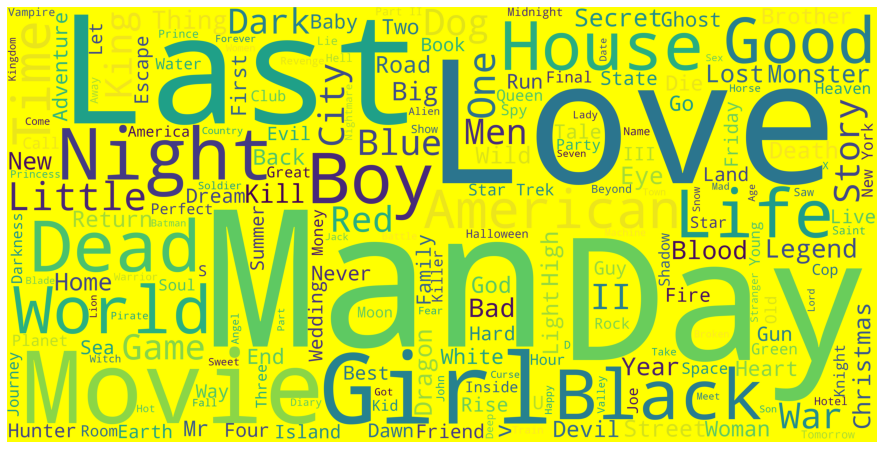

In [120]:
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

#### Palavras mais frequentes no OVERVIEW dos filmes

In [121]:
df["overview"] = df["overview"].astype("str")

In [122]:
df["overview"].astype

<bound method NDFrame.astype of 0       In the 22nd century, a paraplegic Marine is di...
1       Captain Barbossa, long believed to be dead, ha...
2       A cryptic message from Bond’s past sends him o...
3       Following the death of District Attorney Harve...
4       John Carter is a war-weary, former military ca...
                              ...                        
5936    Macbeth, the Thane of Glamis, receives a proph...
5937    Based on the true story of First Sergeant Char...
5938    The true story of Kurt Warner, who went from a...
5939    A Scottish orchid farmer visiting her ill sist...
5940    Catherine Tate's iconic character Nan hits the...
Name: overview, Length: 5939, dtype: object>

In [123]:
all_overview = " ".join(df["overview"])
print(all_overview)

 It's the fictional tale of a wayward 9th grader, Ralph (Adam Butcher), who is secretly living on his own while his widowed, hospitalized mother remains immersed in a coma. Frequently in trouble with Father Fitzpatrick (Gordon Pinsent), the principal of his all-boys, Catholic school, Ralph is considered something of a joke among peers until he decides to pull off a miracle that could save his mother, i.e., winning the Boston Marathon.  Coached by a younger priest and former runner, Father Hibbert (Campbell Scott), whose cynicism has been lifted by the boy's pure hope, Ralph applies himself to his unlikely mission, fending off naysayers and getting help along a very challenging path from sundry allies and friends. Over the course of a midsummer night in Fermanagh in 1890, an unsettled daughter of the Anglo-Irish aristocracy encourages her father's valet to seduce her. Young writer, Richard Collier is met on the opening night of his first play by an old lady who begs him to, "Come back t

In [118]:
title_wordcloud = WordCloud(stopwords = STOPWORDS, 
                            background_color = "yellow", 
                            height=2000, width=4000).generate(all_titles)

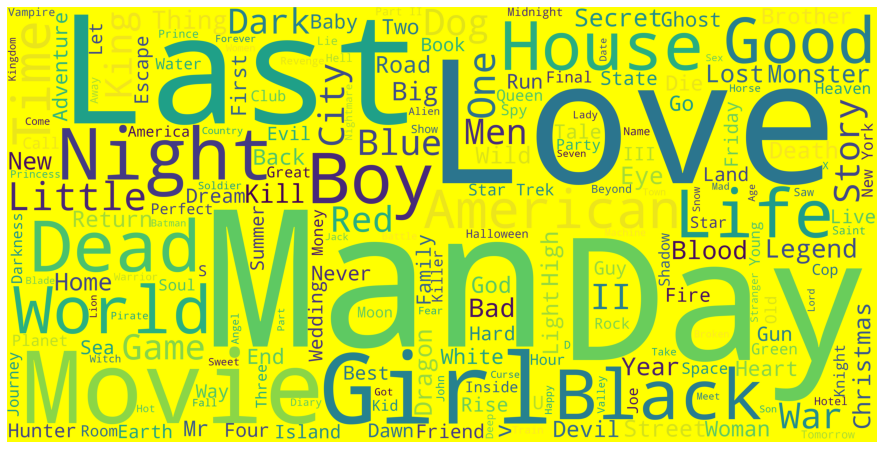

In [119]:
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

#### Quais meses são lançados mais filmes

In [124]:
#Plotando um hisograma por ano
trace1 = go.Histogram(x =  df["release_date"].dt.month,
                      marker = {"color":"red",
                              "line": {'width': 2,
                                      'color': 'black'}})

layout = go.Layout(title= "Quantidade de filmes por mês (1913 - 2022)",
                   yaxis = {"title": "Quantidade"},
                   xaxis = {"title":"mês"})

data = [trace1]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

#### Popularidade dos filmes - os 10 mais

In [125]:
popularidade = df[["original_title", "popularity", "year"]].sort_values("popularity", ascending=False)
popularidade.head(9)

,original_title,popularity,year
5927,Spider-Man: No Way Home,1553.840000,2021.0
5335,Sonic the Hedgehog,1346.056000,2022.0
546,Minions,875.581305,2015.0
5906,Encanto,786.982000,2021.0
95,Interstellar,724.247784,2014.0
5242,Prey,594.664000,2022.0
5933,Sing 2,519.314000,2021.0
788,Deadpool,514.569956,2016.0
4893,Avengers: Infinity War,508.005000,2018.0


In [126]:
#Plotando o rank dos top 10 fatores que influenciam no preço do imovel
trace1 = go.Bar(y =  popularidade["original_title"][0:10],
                x =  popularidade["popularity"][0:10],
                orientation = "h",
                marker = {"color":"yellow",
                              "line": {'width': 2,
                                      'color': 'black'}})


layout = go.Layout(title= "Top 10 - Filmes mais populares",
                   yaxis = {"title": "Titulo dos filmes"},
                   xaxis = {"title":"Nota atribuidas a popularidade", })

data = [trace1]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

#### Vote Count

In [127]:
vote_count = df[["title", 'vote_count', 'year']].sort_values("vote_count", ascending=False)
vote_count.head(10)

,title,vote_count,year
4893,Avengers: Infinity War,25104,2018.0
5142,Avengers: Endgame,21519,2019.0
5243,Joker,20993,2019.0
4833,Black Panther,19364,2018.0
5196,The Lion King,15564,1994.0
4907,Deadpool 2,14929,2018.0
5030,Bohemian Rhapsody,14893,2018.0
5927,Spider-Man: No Way Home,14496,2021.0
5618,La La Land,14436,2016.0
96,Inception,13752,2010.0


In [128]:
#Plotando o rank dos top 10 fatores que influenciam no preço do imovel
trace1 = go.Bar(y =  vote_count["title"][0:10],
                x =  vote_count["vote_count"][0:10],
                orientation = "h",
                marker = {"color":"red",
                              "line": {'width': 2,
                                      'color': 'black'}})

layout = go.Layout(title= "Top 10 - Filmes mais votados",
                   yaxis = {"title": "Título dos filmes"},
                   xaxis = {"title":"Votos"})

data = [trace1]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

## Usando Filtragem Demográfica

In [129]:
c = df["vote_average"].mean()
print(c)

6.177297188078802


In [130]:
m = df["vote_count"].quantile(0.9)
print(m)

2265.5999999999995


In [131]:
q_movies = df[df["vote_count"] >= m]
q_movies.shape

(594, 25)

In [132]:
def wr(dataframe, m=m, c=c):
  v = dataframe["vote_count"]
  R = dataframe["vote_average"]
  return (v/(v+m) * R) + (m/(v+m)*c)

In [133]:
q_movies["score"] = q_movies.apply(wr, axis = 1)

C:\Users\Usuário\AppData\Local\Temp\ipykernel_9552\2739680116.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [134]:
q_movies[["title", "vote_count", "vote_average", "score"]].sort_values("score", ascending = False).head(5)

,title,vote_count,vote_average,score
4893,Avengers: Infinity War,25104,8.268,8.094936
5142,Avengers: Endgame,21519,8.279,8.078802
5058,Spider-Man: Into the Spider-Verse,11580,8.417,8.050510
5196,The Lion King,15564,8.300,8.030269
1881,The Shawshank Redemption,8205,8.500,7.997420


## Modelo usando similaridade entre as tags - Parte 2

In [135]:
df2 = df[["id", "title", "overview", "genres", "keywords", "cast", "crew", "production_companies"]]

In [136]:
df2.isnull().sum()

id                      0
title                   0
overview                0
genres                  0
keywords                0
cast                    0
crew                    0
production_companies    0
dtype: int64

In [137]:
df2.shape

(5939, 8)

In [138]:
df2.tail()

,id,title,overview,genres,keywords,cast,crew,production_companies
5936,591538,The Tragedy of Macbeth,"Macbeth, the Thane of Glamis, receives a proph...","[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...","[{'id': 388, 'name': 'scotland'}, {'id': 1157,...","[{'adult': False, 'gender': 2, 'id': 5292, 'kn...","[{'adult': False, 'gender': 1, 'id': 555, 'kno...","[{'id': 41077, 'logo_path': '/1ZXsGaFPgrgS6ZZG..."
5937,501841,A Journal for Jordan,Based on the true story of First Sergeant Char...,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",[],"[{'adult': False, 'gender': 2, 'id': 135651, '...","[{'adult': False, 'gender': 2, 'id': 29, 'know...","[{'id': 5, 'logo_path': '/71BqEFAF4V3qjjMPCpLu..."
5938,673309,American Underdog,"The true story of Kurt Warner, who went from a...","[{'id': 18, 'name': 'Drama'}]","[{'id': 579, 'name': 'american football'}, {'i...","[{'adult': False, 'gender': 2, 'id': 69899, 'k...","[{'adult': False, 'gender': 2, 'id': 4500, 'kn...","[{'id': 1632, 'logo_path': '/cisLn1YAUuptXVBa0..."
5939,511819,Memoria,A Scottish orchid farmer visiting her ill sist...,"[{'id': 18, 'name': 'Drama'}, {'id': 878, 'nam...","[{'id': 155800, 'name': 'atmospheric'}, {'id':...","[{'adult': False, 'gender': 1, 'id': 3063, 'kn...","[{'adult': False, 'gender': 2, 'id': 2047, 'kn...","[{'id': 310, 'logo_path': '/4Gp5A4YdjPBfsHT47n..."
5940,647808,The Nan Movie,Catherine Tate's iconic character Nan hits the...,"[{'id': 35, 'name': 'Comédia'}]","[{'id': 246, 'name': 'dancing'}, {'id': 772, '...","[{'adult': False, 'gender': 1, 'id': 47646, 'k...","[{'adult': False, 'gender': 2, 'id': 21422, 'k...","[{'id': 174, 'logo_path': '/IuAlhI9eVC9Z8UQWOI..."


#### Função de transformação

In [139]:
def transform(t):
  lista_t = []
  for i in ast.literal_eval(t):
    lista_t.append(i["name"])
  return lista_t

#### Aplicando a função transform na feature genres

In [140]:
df2["genres"] = df2["genres"].apply(transform)

C:\Users\Usuário\AppData\Local\Temp\ipykernel_9552\2369306920.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [141]:
df2.head()

,id,title,overview,genres,keywords,cast,crew,production_companies
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[{""name"": ""Ingenious Film Partners"", ""id"": 289..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]"


#### Aplicando a função transform na feature keywords

In [142]:
df2["keywords"] = df2["keywords"].apply(transform)

C:\Users\Usuário\AppData\Local\Temp\ipykernel_9552\4001170549.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [143]:
df2.head(5)

,id,title,overview,genres,keywords,cast,crew,production_companies
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[{""name"": ""Ingenious Film Partners"", ""id"": 289..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]"


#### Aplicando a função transform na feature cast

In [144]:
df2["cast"] = df2["cast"].apply(transform)

C:\Users\Usuário\AppData\Local\Temp\ipykernel_9552\2609917469.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Aplicando uma função nova na feature crew e selecionar apenas o diretor

In [145]:
def select_director(t):
  lista_t = []
  for i in ast.literal_eval(t):
    if i["job"] == "Director":
      lista_t.append(i["name"])
  return lista_t

In [146]:
df2["crew"] = df2["crew"].apply(select_director)

C:\Users\Usuário\AppData\Local\Temp\ipykernel_9552\3907443645.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [147]:
df2.head()

,id,title,overview,genres,keywords,cast,crew,production_companies
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],"[{""name"": ""Ingenious Film Partners"", ""id"": 289..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski],"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes],"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan],"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton],"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]"


#### Aplicando a função transform na feature cast

In [148]:
df2["production_companies"] = df2["production_companies"].apply(transform)

C:\Users\Usuário\AppData\Local\Temp\ipykernel_9552\854684492.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [149]:
df2.head()

,id,title,overview,genres,keywords,cast,crew,production_companies
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],"[Ingenious Film Partners, Twentieth Century Fo..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski],"[Walt Disney Pictures, Jerry Bruckheimer Films..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes],"[Columbia Pictures, Danjaq, B24]"
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan],"[Legendary Pictures, Warner Bros., DC Entertai..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton],[Walt Disney Pictures]


####Tirando o espaço entre os nomes

In [150]:
def replace_empty(t):
  replace_empty_t = []
  for i in t:
    replace_empty_t.append(i.replace(" ", ""))
  return replace_empty_t

In [151]:
df2["crew"] = df2["crew"].apply(replace_empty)
df2["cast"] = df2["cast"].apply(replace_empty)
df2["keywords"] = df2["keywords"].apply(replace_empty)
df2["genres"] = df2["genres"].apply(replace_empty)
df2["production_companies"] = df2["production_companies"].apply(replace_empty)

C:\Users\Usuário\AppData\Local\Temp\ipykernel_9552\2126951240.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Usuário\AppData\Local\Temp\ipykernel_9552\2126951240.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Usuário\AppData\Local\Temp\ipykernel_9552\2126951240.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [152]:
df2.head()

,id,title,overview,genres,keywords,cast,crew,production_companies
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron],"[IngeniousFilmPartners, TwentiethCenturyFoxFil..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski],"[WaltDisneyPictures, JerryBruckheimerFilms, Se..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",[SamMendes],"[ColumbiaPictures, Danjaq, B24]"
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman, Anne...",[ChristopherNolan],"[LegendaryPictures, WarnerBros., DCEntertainme..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",[AndrewStanton],[WaltDisneyPictures]


#### Transformando coluna overview em lista de nomes

In [153]:
df2["overview"] = df2["overview"].apply(lambda x: x.split())

C:\Users\Usuário\AppData\Local\Temp\ipykernel_9552\3191094578.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [154]:
df2.head()

,id,title,overview,genres,keywords,cast,crew,production_companies
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron],"[IngeniousFilmPartners, TwentiethCenturyFoxFil..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski],"[WaltDisneyPictures, JerryBruckheimerFilms, Se..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",[SamMendes],"[ColumbiaPictures, Danjaq, B24]"
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman, Anne...",[ChristopherNolan],"[LegendaryPictures, WarnerBros., DCEntertainme..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",[AndrewStanton],[WaltDisneyPictures]


In [155]:
df2["tags"] = df2["overview"] + df2["genres"] + df2["keywords"] + df2["cast"] + df2["crew"] + df2["production_companies"]

C:\Users\Usuário\AppData\Local\Temp\ipykernel_9552\3988507654.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [156]:
df2.head(10)

,id,title,overview,genres,keywords,cast,crew,production_companies,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron],"[IngeniousFilmPartners, TwentiethCenturyFoxFil...","[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski],"[WaltDisneyPictures, JerryBruckheimerFilms, Se...","[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",[SamMendes],"[ColumbiaPictures, Danjaq, B24]","[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman, Anne...",[ChristopherNolan],"[LegendaryPictures, WarnerBros., DCEntertainme...","[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",[AndrewStanton],[WaltDisneyPictures],"[John, Carter, is, a, war-weary,, former, mili..."
5,559,Spider-Man 3,"[The, seemingly, invincible, Spider-Man, goes,...","[Fantasy, Action, Adventure]","[dualidentity, amnesia, sandstorm, loveofone's...","[TobeyMaguire, KirstenDunst, JamesFranco, Thom...",[SamRaimi],"[ColumbiaPictures, LauraZiskinProductions, Mar...","[The, seemingly, invincible, Spider-Man, goes,..."
6,38757,Tangled,"[When, the, kingdom's, most, wanted-and, most,...","[Animation, Family]","[hostage, magic, horse, fairytale, musical, pr...","[ZacharyLevi, MandyMoore, DonnaMurphy, RonPerl...","[ByronHoward, NathanGreno]","[WaltDisneyPictures, WaltDisneyAnimationStudios]","[When, the, kingdom's, most, wanted-and, most,..."
7,99861,Avengers: Age of Ultron,"[When, Tony, Stark, tries, to, jumpstart, a, d...","[Action, Adventure, ScienceFiction]","[marvelcomic, sequel, superhero, basedoncomicb...","[RobertDowneyJr., ChrisHemsworth, MarkRuffalo,...",[JossWhedon],"[MarvelStudios, PrimeFocus, RevolutionSunStudios]","[When, Tony, Stark, tries, to, jumpstart, a, d..."
8,767,Harry Potter and the Half-Blood Prince,"[As, Harry, begins, his, sixth, year, at, Hogw...","[Adventure, Fantasy, Family]","[witch, magic, broom, schoolofwitchcraft, wiza...","[DanielRadcliffe, RupertGrint, EmmaWatson, Tom...",[DavidYates],"[WarnerBros., HeydayFilms]","[As, Harry, begins, his, sixth, year, at, Hogw..."
9,209112,Batman v Superman: Dawn of Justice,"[Fearing, the, actions, of, a, god-like, Super...","[Action, Adventure, Fantasy]","[dccomics, vigilante, superhero, basedoncomicb...","[BenAffleck, HenryCavill, GalGadot, AmyAdams, ...",[ZackSnyder],"[DCComics, AtlasEntertainment, WarnerBros., DC...","[Fearing, the, actions, of, a, god-like, Super..."


In [157]:
df3 = df2.drop(columns = ["overview", "genres", "keywords", "cast", "crew", "production_companies"])

In [158]:
df3.head(2)

,id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."


In [159]:
df3['tags'] = df3['tags'].apply(lambda i: " ".join(i))

In [160]:
df3.shape

(5939, 3)

## Implementação do modelo

In [161]:
vectorizer = CountVectorizer(max_features = 5000, 
                             stop_words = "english")

In [162]:
X = vectorizer.fit_transform(df3["tags"]).toarray()

In [163]:
X.shape

(5939, 5000)

In [164]:
similarity = cosine_similarity(X)

In [165]:
similarity

array([[1.        , 0.06900656, 0.04901431, ..., 0.        , 0.02519763,
        0.        ],
       [0.06900656, 1.        , 0.07610194, ..., 0.03367175, 0.02608203,
        0.        ],
       [0.04901431, 0.07610194, 1.        , ..., 0.        , 0.        ,
        0.02054987],
       ...,
       [0.        , 0.03367175, 0.        , ..., 1.        , 0.03688556,
        0.02727724],
       [0.02519763, 0.02608203, 0.        , ..., 0.03688556, 1.        ,
        0.04225771],
       [0.        , 0.        , 0.02054987, ..., 0.02727724, 0.04225771,
        1.        ]])

In [166]:
def sistema_recomendacao(movie):
  index = df3[df3["title"] == movie].index[0]
  distance = sorted(list(enumerate(similarity[index])), reverse=True, key = lambda x:x[1])
  for i in distance[1:6]:
    print(df3.iloc[i[0]].title)

In [167]:
sistema_recomendacao("Spider-Man 3")

Spider-Man 2
Spider-Man
The Amazing Spider-Man 2
The Amazing Spider-Man
Spider-Man: No Way Home


#### Dump

In [169]:
pickle.dump(df3, open('models/lista_filmes.pkl', 'wb'))
pickle.dump(similarity, open('models/similarity.pkl', 'wb'))